<a href="https://colab.research.google.com/github/Anjali-Sinkar/PRODIGY_ML_01/blob/main/Prodigy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

# Upload the dataset (make sure to upload 'train.csv')
uploaded = files.upload()

# Load the dataset
train = pd.read_csv('/content/train.csv')

# Preview the first few rows of the dataset
train.head()


Saving train.csv to train (2).csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Select relevant features for the model
X = train[['GrLivArea', 'TotRmsAbvGrd', 'FullBath']]  # Square footage, number of rooms, and bathrooms
y = train['SalePrice']  # Target variable: house price

# Handle missing values if necessary (example: fill missing values with the mean)
X = X.fillna(X.mean())
y = y.fillna(y.mean())


In [ ]:
# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3234537183.9084826
R-squared: 0.5783051337663176


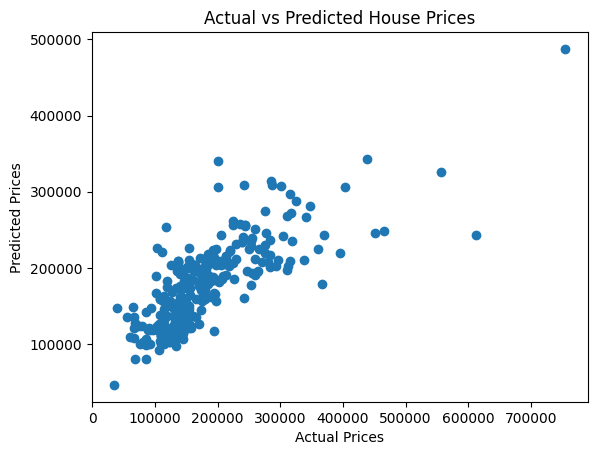

In [ ]:
# Plot the predicted vs actual house prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [ ]:
import joblib
joblib.dump(model, 'house_price_model.pkl')  # Save the model


['house_price_model.pkl']

In [ ]:
# Generate random input values for the features
random_square_footage = np.random.randint(500, 5000)  # Random square footage between 500 and 5000 sq ft
random_rooms = np.random.randint(3, 10)  # Random number of rooms between 3 and 10
random_bathrooms = np.random.randint(1, 5)  # Random number of bathrooms between 1 and 5

# Print the random values
print(f"Random Input: Square Footage = {random_square_footage} sq ft, Rooms = {random_rooms}, Bathrooms = {random_bathrooms}")

# Create a DataFrame for the random input
random_input = pd.DataFrame({
    'GrLivArea': [random_square_footage],
    'TotRmsAbvGrd': [random_rooms],
    'FullBath': [random_bathrooms]
})

# Use the trained model to predict the house price
predicted_price = model.predict(random_input)

# Print the predicted house price
print(f"Predicted House Price: ${predicted_price[0]:,.2f}")


Random Input: Square Footage = 4725 sq ft, Rooms = 4, Bathrooms = 2
Predicted House Price: $552,414.38
